# Data mining with python

## import

In [202]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import graphviz
from sklearn import tree, metrics


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## read csv file and show some

In [160]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("./titanic_data_set/train.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## show info to find null values

In [161]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## drop unnecessary columns

In [162]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## Sex : male = 1, female = 0

In [166]:
titanic_df.Sex = (titanic_df.Sex.values == 'male').astype(int)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# convert continuous variable to a categorical variable
### in this case, convert age and fare

In [124]:
x = pd.cut(np.array([.2, 1.4, 2.5, 6.2, 9.7, 2.1]), 3, labels=['low', 'med', 'high'])
x

[low, low, low, med, high, low]
Categories (3, object): [low < med < high]

In [167]:
titanic_df.Age = pd.cut(list, 4, labels=[0, 1, 2, 3])
titanic_df.Fare = pd.cut(list, 3, labels=[0, 1, 2])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,3,1,0,2
1,1,1,0,0,1,0,0
2,1,3,0,0,0,0,0
3,1,1,0,0,1,0,0
4,0,3,1,3,0,0,2


In [126]:
x = titanic_df.Age.values.astype(int)
titanic_df.Age = x
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,2,1,0,2
1,1,1,0,0,1,0,0
2,1,3,0,0,0,0,0
3,1,1,0,0,1,0,0
4,0,3,1,2,0,0,2


In [127]:
x = titanic_df.Fare.values.astype(int)
titanic_df.Fare = x
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,2,1,0,2
1,1,1,0,0,1,0,0
2,1,3,0,0,0,0,0
3,1,1,0,0,1,0,0
4,0,3,1,2,0,0,2


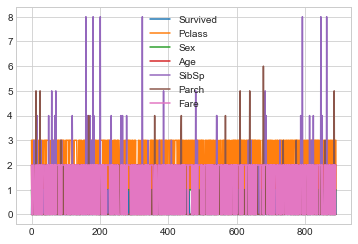

In [158]:
titanic_df.plot()
plt.show()

In [168]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [169]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
739,3,1,3,0,0,2
806,1,1,3,0,0,2
150,2,1,3,0,0,2
429,3,1,3,0,0,2
477,3,1,3,1,0,2


In [170]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
283,3,1,3,0,0,2
252,1,1,3,0,0,2
438,1,1,3,1,4,2
50,3,1,3,4,1,2
783,3,1,3,1,2,2


In [171]:
y_train.head()

739    0
806    0
150    0
429    1
477    0
Name: Survived, dtype: int64

In [172]:
y_test.head()

283    1
252    0
438    0
50     0
783    0
Name: Survived, dtype: int64

In [173]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [174]:
y_pred = classifier.predict(X_test)

In [175]:
print(confusion_matrix(y_test, y_pred))

[[106   9]
 [ 28  36]]


In [203]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.20670391061452514
Mean Squared Error: 0.20670391061452514
Root Mean Squared Error: 0.454647017602145


In [176]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85       115
          1       0.80      0.56      0.66        64

avg / total       0.79      0.79      0.78       179



In [177]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [178]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("graphviz") 

'graphviz.pdf'

In [179]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

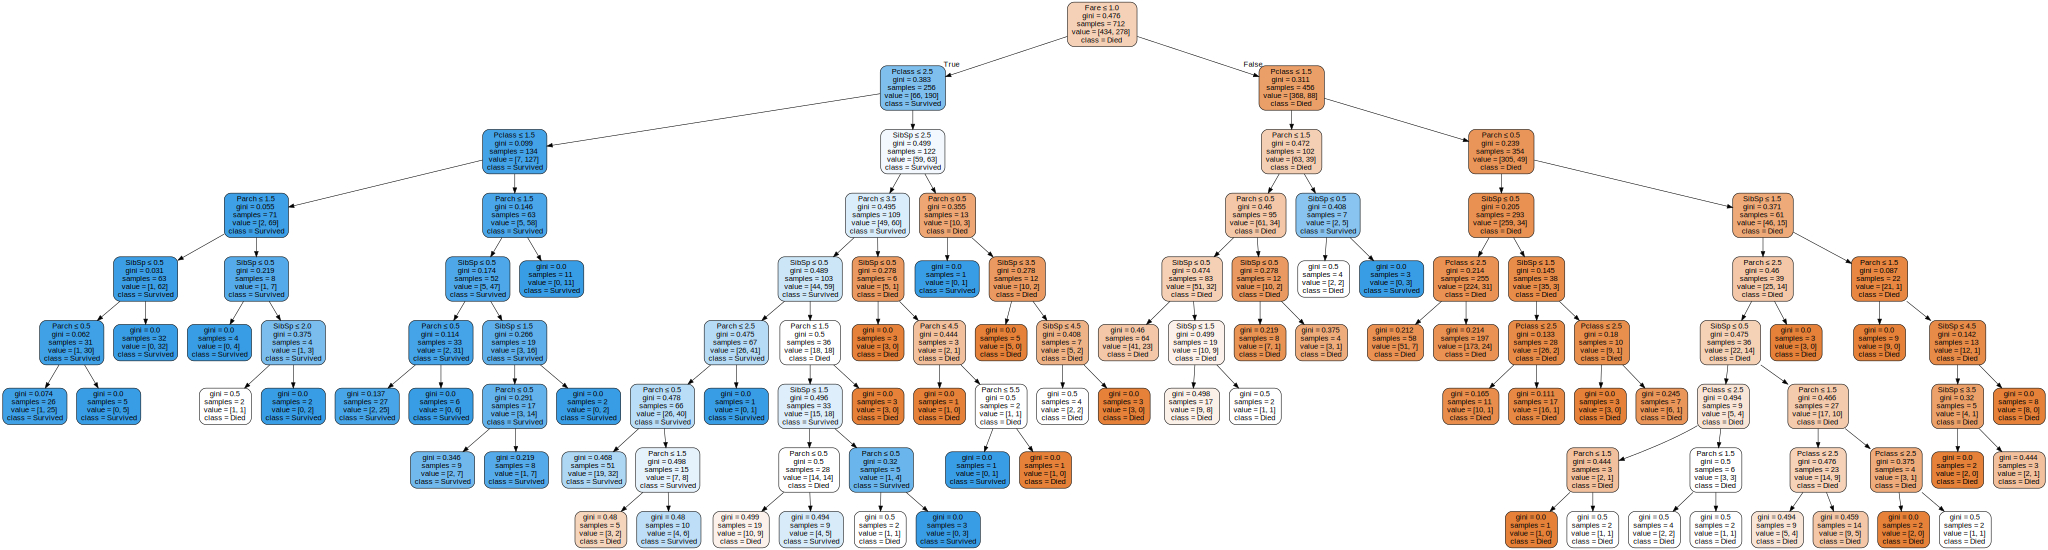

In [185]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=['Died', 'Survived'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)  
graph


In [188]:
titanic_df.Fare.values

[2, 0, 0, 0, 2, ..., 2, 0, 0, 2, 2]
Length: 891
Categories (3, int64): [0 < 1 < 2]

In [193]:
list = {0:0, 1:0, 2:0}
for x in titanic_df.Fare :
    if x == 0 :
        list[0] += 1
    if x == 1 :
        list[1] += 1
    if x == 2 :
        list[2] += 1
list

{0: 314, 1: 0, 2: 577}

In [197]:
titanic_df.Fare.value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      0
2      0
3      0
4      2
5      2
6      2
7      2
8      0
9      0
10     0
11     0
12     2
13     2
14     0
15     0
16     2
17     2
18     0
19     0
20     2
21     2
22     0
23     2
24     0
25     0
26     2
27     2
28     0
29     2
      ..
861    2
862    0
863    0
864    2
865    0
866    0
867    2
868    2
869    2
870    2
871    0
872    2
873    2
874    0
875    0
876    2
877    2
878    2
879    0
880    0
881    2
882    0
883    2
884    2
885    0
886    2
887    0
888    0
889    2
890    2
Name: Fare, Length: 891, dtype: category
Categories (3, int64): [0 < 1 < 2]>